## Introduction to GNNs with PyTorch Geometric

In this short notebook, the goal is to provide a introductory guide to get started with Graph Neural Networks using the popular library called [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/index.html). PyTorch Geometric is a PyTorch based libary hence we will be using PyTorch in this tutorial. 

The code used in this tutorial has been adapted from their official [examples](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html). I have incorporated a bit more beginner-friendly guidance and kept it minimal.

In [2]:
# Find the CUDA version PyTorch was installed with
# 导入torch库并打印出正在使用的CUDA版本
!python -c "import torch; print(torch.version.cuda)"

None


In [1]:
# PyTorch version
# 导入torch库并打印出其版本号
!python -c "import torch; print(torch.__version__)"

1.12.1


Install the follow packages but make sure to 

---

install the right version below. Find more instructions [here](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html) if you get lost. 

In [4]:
# 使用pip在Python环境中安装torch-scatter库，并指定了一个特定的URL来源来获取与您正在使用的PyTorch版本兼容的软件包
# torch-scatter库提供了一些用于处理图结构数据的函数和操作
!pip install todrch-scatter -f https://data.pyg.org/whl/torch-1.7.0.html

Looking in links: https://data.pyg.org/whl/torch-1.11.0.html
  Using cached torch_scatter-2.1.1.tar.gz (107 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-scatter
Failed to build torch-scatter
  Running setup.py install for torch-scatter: started
  Running setup.py install for torch-scatter: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-cpython-310
      creating build\lib.win-amd64-cpython-310\torch_scatter
      copying torch_scatter\placeholder.py -> build\lib.win-amd64-cpython-310\torch_scatter
      copying torch_scatter\scatter.py -> build\lib.win-amd64-cpython-310\torch_scatter
      copying torch_scatter\segment_coo.py -> build\lib.win-amd64-cpython-310\torch_scatter
      copying torch_scatter\segment_csr.py -> build\lib.win-amd64-cpython-310\torch_scatter
      copying torch_scatter\testing.py -> build\lib.win-amd64-cpython-310\torch_scatter
      copying torch_scatter\utils.py -> build\lib.win-amd64-cpython-310\torch_scatter
      copying torch_scatter\__init__.py -> build\lib.win-amd64-cpython-310\torch_scatter
      creating build\lib.win-amd

In [8]:
# torch-sparse是PyTorch的一个扩展库，提供了一些用于稀疏矩阵操作的函数和操作
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0.html

Looking in links: https://data.pyg.org/whl/torch-1.11.0.html
     |████████████████████████████████| 48 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 41.6 MB 73.5 MB/s eta 0:00:01
  Created wheel for torch-sparse: filename=torch_sparse-0.6.13-cp38-cp38-linux_x86_64.whl size=570934 sha256=27a158cb7be5e10bb7846cce70764338cbb12828ea70eaf5a41a79f15cfc60c3
  Stored in directory: /home/codespace/.cache/pip/wheels/81/94/1a/3fd0c022a887c997c5e681961f2bd2e41f8fd6b66562b90fb6
Successfully built torch-sparse


In [9]:
# 一个用于处理图结构数据的PyTorch扩展库，提供了丰富的功能和工具，用于图神经网络的构建和训练
!pip install torch-geometric

     |████████████████████████████████| 407 kB 26.9 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 1.8 MB/s  eta 0:00:01
     |████████████████████████████████| 11.7 MB 79.4 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 87.1 MB/s eta 0:00:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     |████████████████████████████████| 31.2 MB 84.1 MB/s eta 0:00:01
     |████████████████████████████████| 503 kB 69.2 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 78.1 MB/s eta 0:00:01
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616602 sha256=c3dd839f53e4c307e7a223cb3868bbe2dfc5bb5a5586c2f1bcfe5d2f20f6d6a6
  Stored in directory: /home/codespace/.cache/pip/wheels/c1/be/e9/b90ded2a496c975a539af002fe1f0f2a22a97af13b41866d6e
Successfully built torch-geometric


## Getting Started

Import PyTorch

In [2]:
# 导入torch库
import torch

# 打印torch库版本
print(torch.__version__)

1.12.1


The great thing about PyTorch Geometric is that it contain useful functionalities to import and load graph related data. 

In [1]:
# 从torch_geometric.data模块中导入了Data类
# torch_geometric是一个用于处理图数据的PyTorch扩展库，Data类是其中的一个核心类，用于表示图数据
from torch_geometric.data import Data

Now let's create an unweighted and undirected graph with three nodes and four total edges.

In [3]:
# 图的边索引
# 整数张量，每列包含一对节点索引，表示图中的边。有4条边，连接了3个节点
# 0---1
# 1---0
# 1---2
# 2---1
edge_index = torch.tensor([[0, 1, 1, 2], [1, 0, 2, 1]], dtype=torch.long)

# 节点特征
x = torch.tensor([[-1], [0], [1]])

# create graph data object
data = Data(x=x, edge_index=edge_index)
print(data)

Data(x=[3, 1], edge_index=[2, 4])


Our data object `Data` has many useful utility functions to check the properties of the graph. 

In [4]:
# 图中边的数量
print(data.num_edges)

4


In [5]:
# 图中节点的数量
print(data.num_nodes)

3


In [6]:
# 节点特征的数量
print(data.num_features)

1


In [7]:
# 是否是有向图
print(data.is_directed())

False


## Loading Data

Find more fun functions related to graph data [here](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data). 

One of the cool things about the PyTorch Geometric library is that it contains out-of-the-box benchmark datasets that are ready to use and explore. A popular dataset is the Cora dataset that is used for supervised graph node classification. (We will talk about these applications in an upcoming tutorial but for now we will focus on the data itself).

"The Cora dataset consists of 2708 scientific publications classified into one of seven classes. The citation network consists of 5429 links. Each publication in the dataset is described by a 0/1-valued word vector indicating the absence/presence of the corresponding word from the dictionary. The dictionary consists of 1433 unique words." - [Papers with Code](https://paperswithcode.com/dataset/cora).

Let's load the Cora dataset:

In [8]:
from torch_geometric.datasets import Planetoid      # 加载常见图数据集的类之一。Planetoid 类用于加载具有预定义划分的图数据集，例如 Cora、CiteSeer、PubMed 等

# root='tmp/Cora'数据集的根目录路径
# name='Cora'要加载的数据集的名称
dataset = Planetoid(root='tmp/Cora', name='Cora')

Processing...
Done!


Let's check some of the properties of the Cora dataset.

In [10]:
# 数据集中的图数量
print("Number of graphs: ", len(dataset))

# 特征数量
print("Number of features: ", dataset.num_features)

# 类别数量
print("Number of classes: ", dataset.num_classes)

Number of graphs:  1
Number of features:  1433
Number of classes:  7


We can see that this particular graph dataset only contains one graph. Graph data can be very complex and can include multiple graphs depending on the type of data and application. Let's check more feature of the Cora dataset:

In [11]:
# 以data存储数据集中第一个图
data = dataset[0]

# 图中的节点数量
print("Number of nodes: ", data.num_nodes)

# 图中的边的数量
print("Number of edges: ", data.num_edges)

# 是否是有向图
print("Is directed: ", data.is_directed())

Number of nodes:  2708
Number of edges:  10556
Is directed:  False


You can sample nodes from the graph this way:

In [12]:
# 所选图中节点子集的形状
print("Shape of sample nodes: ", data.x[:5].shape)

Shape of sample nodes:  torch.Size([5, 1433])


We extracted 5 nodes from the graph and checked its shape. You will see that each node has `1433` features.

Another great advantage of using PyTorch Geometric to load the Cora data is that it comes pre-processed and ready to use. It also has the splits for training, validation and test which we can directly use for training a GNN.

Let's check some stats for the partitions of the data:

In [13]:
# 用于训练的节点数量
print("# of nodes to train on: ", data.train_mask.sum().item())

# 用于测试的节点数量
print("# of nodes to test on: ", data.test_mask.sum().item())

# 用于验证的节点数量
print("# of nodes to validate on: ", data.val_mask.sum().item())

# of nodes to train on:  140
# of nodes to test on:  1000
# of nodes to validate on:  500


That information is important as it will indicate to our model which nodes to train against and which to test against, and so on.

When training neural networks we train them using batches of data. PyTorch Geometric provides efficient processes to load batches of data.

PyTorch Geometric contains a data loader which is a very popular feature in PyTorch to efficiently load data when training neural networks.
 
So let's try to load the data using the built in `DataLoader`:


In [14]:
# 导入了 Planetoid 类和 DataLoader 类。Planetoid 类用于加载常见的图数据集，而 DataLoader 类用于批量加载图数据
from torch_geometric.datasets import Planetoid
from torch_geometric.loader import DataLoader
# 检查是否有可用的 CUDA 设备。如果有可用的 CUDA 设备，则将设备设置为 CUDA，否则将设备设置为 CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [15]:
print(device)

cpu


In [16]:
# 加载了名为 "Cora" 的图数据集，并将其存储在 dataset 变量中
dataset = Planetoid(root='tmp/Cora', name='Cora')
# 从数据集中选择了第一个图，并使用 to 方法将其移动到之前创建的设备对象 device 上
data = dataset[0].to(device)

Print some quick statistics about the data:

In [17]:
print("X shape: ", data.x.shape)
print("Edge shape: ", data.edge_index.shape)
print("Y shape: ", data.y.shape)

X shape:  torch.Size([2708, 1433])
Edge shape:  torch.Size([2, 10556])
Y shape:  torch.Size([2708])


## Model and Training

Finally, let's define a standard GCN to train on the Cora dataset. The aim is to train a model that gets better at predicting the class of the node.

To keep thins simple we will use the same model definition as used in the [tutorial](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html) we adpated the code from. Note that we are using the built-in `GCNConv` model but you could easily implement your own (something we will cover in a future tutorial). 

The model below uses two `GCNConv` layers. The first layer is followed by a non-linearity `ReLU` and `Dropout`. The result is fed to the second layer on top of which we apply `Softmax` to get distribution over the number of classes.

In [18]:
import torch.nn.functional as F         # 包含各种激活函数和损失函数
from torch_geometric.nn import GCNConv  # 图卷积层

class GCN(torch.nn.Module):             # 自定义模型类，继承自 torch.nn.Module
    def __init__(self):
        super().__init__()
        """ GCNConv layers """
        # 输入特征维度为 data.num_features，输出特征维度为 16
        self.conv1 = GCNConv(data.num_features, 16)
        # 输入特征维度为 16，输出特征维度为 dataset.num_classes
        self.conv2 = GCNConv(16, dataset.num_classes)

    # 前向传播
    def forward(self, data):
        # 节点特征和边索引
        x, edge_index = data.x, data.edge_index
        # 第一个卷积层
        x = self.conv1(x, edge_index)
        # 激活函数
        x = F.relu(x)
        # dropout操作
        x = F.dropout(x, training=self.training)
        # 第二个卷积层
        x = self.conv2(x, edge_index)

        # 先softmax操作，再计算对数值，作为模型的输出
        return F.log_softmax(x, dim=1)

Initial model and optimizer

In [19]:
# 创建实例并将移动到之前创造的设备对象
model = GCN().to(device)
# 优化器
# Adam常用的优化算法，用于自适应地调整学习率，并更新模型参数以最小化定义的损失函数
# lr=0.01学习率
# 权重衰减，防止过拟合
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)

Define accuracy function for evaluating performance:

In [20]:
# 计算准确率
def compute_accuracy(pred_y, y):
    return (pred_y == y).sum()

And finally we train the model on the trainin nodes for 200 epochs:

In [21]:
# 将模型设置为训练模式
model.train()           
# 创建空列表，分别用于存储损失和精确度
losses = []
accuracies = []
# 开始循环，迭代训练200个周期
for epoch in range(200):
    # 将优化器中所有参数的梯度置零，以便进行新一轮的反向传播和梯度更新
    optimizer.zero_grad()
    # 前向传播得到输出结果
    out = model(data)
    # 负对数似然损失函数
    loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
    # 得到正确预测的数量
    correct = compute_accuracy(out.argmax(dim=1)[data.train_mask], data.y[data.train_mask])
    # 除以训练集样本数量得到准确率
    acc = int(correct) / int(data.train_mask.sum())
    # 将当前训练得到的损失和准确率加入对应的列表中
    losses.append(loss.item())
    accuracies.append(acc)
    # 损失函数关于模型参数的梯度
    loss.backward()
    # 根据梯度更新参数
    optimizer.step()
    # 每隔 10 个训练周期打印一次当前训练周期的信息，包括训练周期的索引、损失值和训练集上的准确率
    if (epoch+1) % 10 == 0:
        print('Epoch: {}, Loss: {:.4f}, Training Acc: {:.4f}'.format(epoch+1, loss.item(), acc))


Epoch: 10, Loss: 0.8104, Training Acc: 0.8929
Epoch: 20, Loss: 0.2334, Training Acc: 0.9857
Epoch: 30, Loss: 0.0976, Training Acc: 0.9857
Epoch: 40, Loss: 0.0554, Training Acc: 0.9929
Epoch: 50, Loss: 0.0512, Training Acc: 1.0000
Epoch: 60, Loss: 0.0356, Training Acc: 1.0000
Epoch: 70, Loss: 0.0267, Training Acc: 1.0000
Epoch: 80, Loss: 0.0406, Training Acc: 1.0000
Epoch: 90, Loss: 0.0423, Training Acc: 0.9929
Epoch: 100, Loss: 0.0336, Training Acc: 1.0000
Epoch: 110, Loss: 0.0423, Training Acc: 0.9929
Epoch: 120, Loss: 0.0419, Training Acc: 0.9929
Epoch: 130, Loss: 0.0335, Training Acc: 1.0000
Epoch: 140, Loss: 0.0276, Training Acc: 1.0000
Epoch: 150, Loss: 0.0275, Training Acc: 1.0000
Epoch: 160, Loss: 0.0287, Training Acc: 0.9929
Epoch: 170, Loss: 0.0263, Training Acc: 1.0000
Epoch: 180, Loss: 0.0240, Training Acc: 1.0000
Epoch: 190, Loss: 0.0275, Training Acc: 1.0000
Epoch: 200, Loss: 0.0212, Training Acc: 1.0000


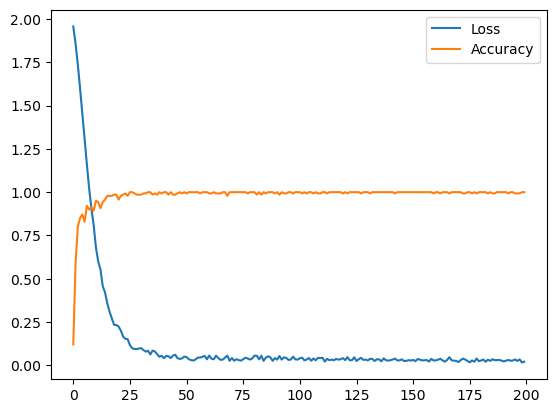

In [22]:
# plot the loss and accuracy
import matplotlib.pyplot as plt     # 数据可视化库
plt.plot(losses)                    # 损失变化曲线
plt.plot(accuracies)                # 准确率变化曲线
plt.legend(['Loss', 'Accuracy'])    # 接受一个字符串列表作为输入，每个字符串对应一个曲线的标签
plt.show()                          # 显示绘制的图形界面

It looks like the model achieves a very high accuracy and small loss on the training dataset. To see how well it generalizes, let's test on the testing nodes:

In [23]:
# evaluate the model on test set
model.eval()            # 将模型设置为评估模式
pred = model(data).argmax(dim=1)        # 对测试集数据 data 进行前向传播，并使用 .argmax(dim=1) 获取每个样本的预测类别索引
correct = compute_accuracy(pred[data.test_mask], data.y[data.test_mask])        # 测试集上准确预测的数量
acc = int(correct) / int(data.test_mask.sum())                                  # 得到准确率
print(f'Accuracy: {acc:.4f}')       # 打印结果

Accuracy: 0.8010


Very cool! It seems we got a very nice accuracy for the test as well. Our model is doing okay. There are many ways you can go about trying to improve this model, but we will keep that for another time. Hopefully, with this tutorial you got a glimpse of graph data and how to use PyTorch Geometric to train GNNs on a very popular dataset. 

Note that I haven't tested if this code works with GPUs. I will leave that as an exercise for the learner. 

If you are interested in the full tutorial and more examples, visit the [PyTorch Geomtric documentation](https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html) where I adapted the code from. 

Feel free to reach out on [Twitter](https://twitter.com/omarsar0) if you have any further questions.